<a href="https://colab.research.google.com/github/you444Mo/Python-Projects/blob/main/GEN_BUS_657_Assignment_1_Clustering_Wines_Moreimi_Zachary_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Clustering Wines**

**Objective:**

How many different wine types are there, and how do these types relate to quality?

Proceed as follows:

* Run a type of cluster analysis on the wine dataset,
* Determine an appropriate number of clusters.
* Visualize and interpret the clusters.

### Import Needed Packages/Data:

In [ ]:
### Import Needed Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import euclidean

In [ ]:
### Create Clone of github repository in google for usage
!git clone https://github.com/danielbauer1979/MSDIA_PredictiveModelingAndMachineLearning.git

fatal: destination path 'MSDIA_PredictiveModelingAndMachineLearning' already exists and is not an empty directory.


In [ ]:
### Read Data Into Df
Wines = pd.read_csv('/content/MSDIA_PredictiveModelingAndMachineLearning/GB886_VIII_4_winequality.csv')

In [ ]:
### View Data
Wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Initial Data Analysis:

In [ ]:
Wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
Wines.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
### Null Check
Wines.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**<u>Notes:</u>**

No nulls in Data

In [ ]:
### Dupe Check
Wines[Wines.duplicated]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,0
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,0
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,0


In [ ]:
### View Example
Wines.query("`fixed acidity` == 7.4 & `volatile acidity` == 0.700")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
4,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


**<u>Notes:</u>**

Noticing duplicate records in data (240 records affected out of 1599). For the purpose of clustering, will drop duplicates prior to creating clusters.

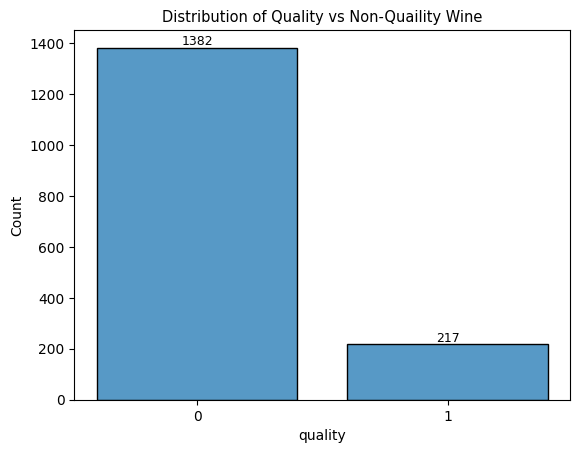

In [ ]:
### Distribution of quality field

y = sns.histplot(
    data = Wines,
    x = 'quality',
    binrange= (np.min(Wines['quality']) - 0.5, np.max(Wines['quality']) + 0.5),
    binwidth = 1,
    shrink= 0.8
)

plt.xticks([0,1])
plt.bar_label(y.containers[0],fontsize = 9)

plt.title("Distribution of Quality vs Non-Quaility Wine", fontsize = 10.5)

plt.show()

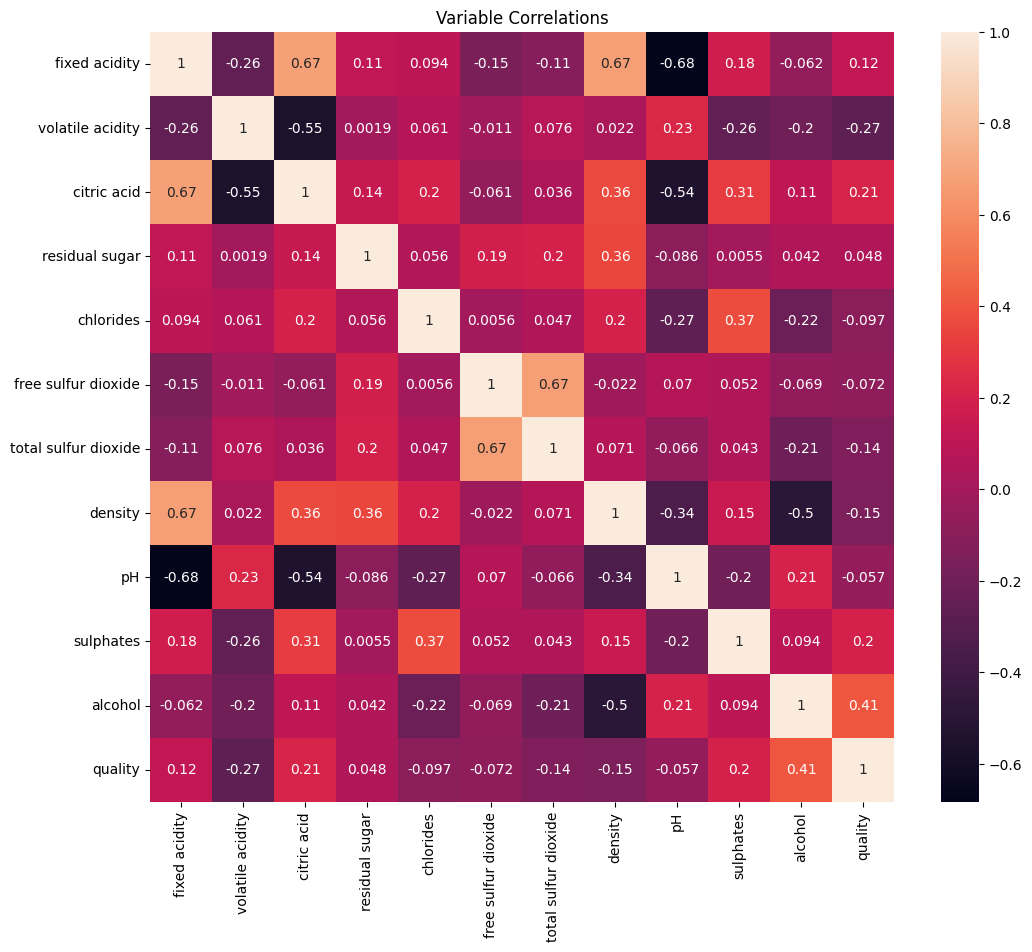

In [ ]:
### Check for intra variate relationships

plt.figure(figsize = (12,10))

sns.heatmap(
    data = Wines.corr(),
    annot = True
)

plt.title("Variable Correlations")
plt.show()

Fair amount of correlations amongst the features. No coefficients represent near perfect or perfect correlation.

### Data Prep and K-Means Clustering:

In [ ]:
### Drop Dupes
Wines_No_Dupe = Wines.drop_duplicates()

In [ ]:
### Features
Features = Wines_No_Dupe.drop(columns = ['quality'])
### Target
Target = Wines_No_Dupe['quality']

In [ ]:
print(Features.shape)
print(Target.shape)

(1359, 11)
(1359,)


In [ ]:
### Scale Data (Features Only)
scaler = MinMaxScaler()
scaler.fit(Features)
Wines_sc = scaler.transform(Features)
Wines_sc

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.11504425, 0.29452055, 0.1       , ..., 0.61417323, 0.25748503,
        0.43076923],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

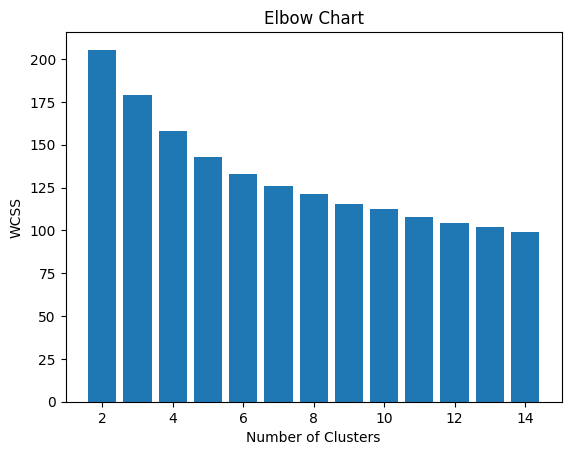

In [ ]:
### Determine number of clusters
WCSS = []
for i in range(2,15):
  kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 42)
  kmeans.fit(Wines_sc)
  WCSS.append(kmeans.inertia_) ### .inertia_ attribute stores the sum of squared distances of samples to their closest cluster center
plt.bar(range(2,15), WCSS)
plt.title('Elbow Chart')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**<u>Notes:</u>**

9 Seems to be a reasonable number of clusters. At that point and on, the WCSS begins to flatten out.

In [ ]:
### Run Kmeans Algo on Scaled Wines Df
kmeans = KMeans(n_clusters=9, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 42)
kmeans.fit(Wines_sc)

KMeans(max_iter=1000, n_clusters=9, n_init=10, random_state=42)

In [ ]:
### View Labels
kmeans.labels_

array([0, 0, 0, ..., 8, 8, 1], dtype=int32)

In [ ]:
### Add Labels to Dataset
Wines_No_Dupe['K_Means_Cl'] = kmeans.labels_

/tmp/ipython-input-2913144106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wines_No_Dupe['K_Means_Cl'] = kmeans.labels_


In [ ]:
### Show dataframe
Wines_No_Dupe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,K_Means_Cl
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,7
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,0


### Interpretation

In [ ]:
#### See the clusters where most of the high quality wines (quality = 1) Lie
Wines_No_Dupe.groupby('K_Means_Cl')['quality'].sum()

,quality
K_Means_Cl,
0,17
1,83
2,6
3,3
4,7
5,22
6,1
7,41
8,4


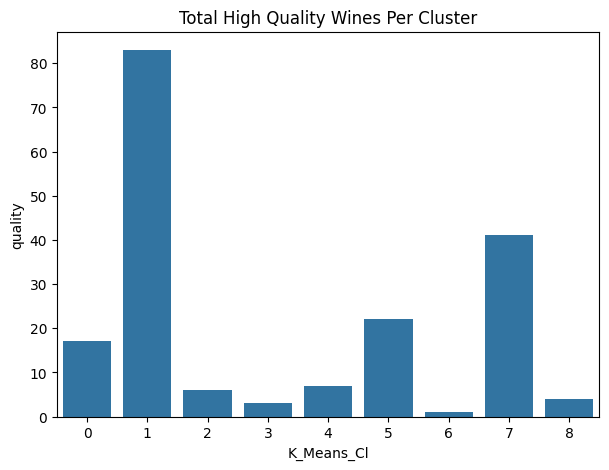

In [ ]:
### Total High Quality Wines (1s) Per Segement

plt.figure(figsize = (7,5))

sns.barplot(
    data = Wines_No_Dupe,
    x = 'K_Means_Cl',
    y = 'quality',
    estimator = 'sum',
    errorbar= None

)

plt.title("Total High Quality Wines Per Cluster")

plt.show()

In [ ]:
#### View clusters in descending order by total quality wines
Wines_No_Dupe.groupby('K_Means_Cl')['quality'].sum().sort_values(ascending = False)

,quality
K_Means_Cl,
1,83
7,41
5,22
0,17
4,7
2,6
8,4
3,3
6,1


In [ ]:
#### Re-Label Clusters based on distribution of High Quality Wines
def relabel(label):
  if label == 1:
    return 8
  elif label == 7:
    return 7
  elif label == 5:
    return 6
  elif label == 0:
    return 5
  elif label == 4:
    return 4
  elif label == 2:
    return 3
  elif label == 8:
    return 2
  elif label == 3:
    return 1
  elif label == 6:
    return 0

In [ ]:
### Apply function to kmeans labels
KMeans_Relabel = list(map(relabel,kmeans.labels_))

In [ ]:
### Relabel Field in DF
Wines_No_Dupe['K_Means_Cl'] = KMeans_Relabel

/tmp/ipython-input-1493770154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wines_No_Dupe['K_Means_Cl'] = KMeans_Relabel


In [ ]:
### View DF
Wines_No_Dupe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,K_Means_Cl
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,7
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,5


In [ ]:
### View New Distribution of quality by segment
Wines_No_Dupe.groupby('K_Means_Cl')['quality'].sum().sort_values(ascending = False)

,quality
K_Means_Cl,
8,83
7,41
6,22
5,17
4,7
3,6
2,4
1,3
0,1


<u>**Notes**</u>

Now, the higher the cluster segment, the more high quality wines (cluster 8 containing the most amount of high quality wines, 0 containing the least).

#### Data Viz:

In [ ]:
### Grab all features (except for target and clusters)
feature_lst = list(Features.columns)

feature_lst

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

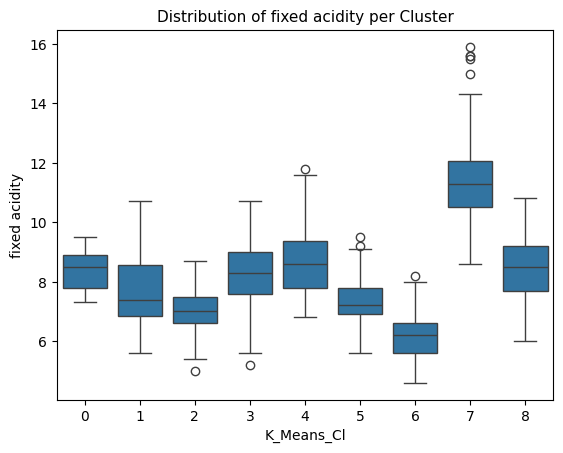

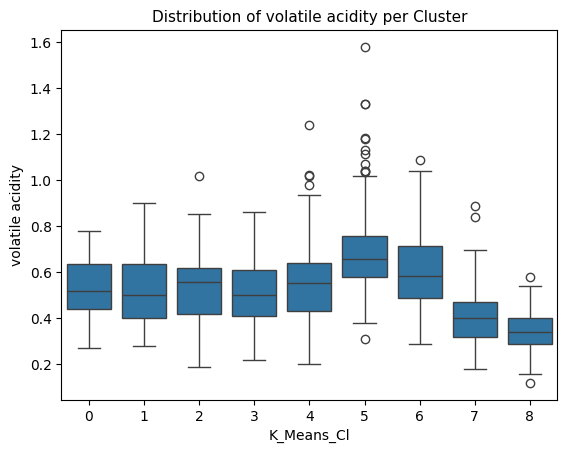

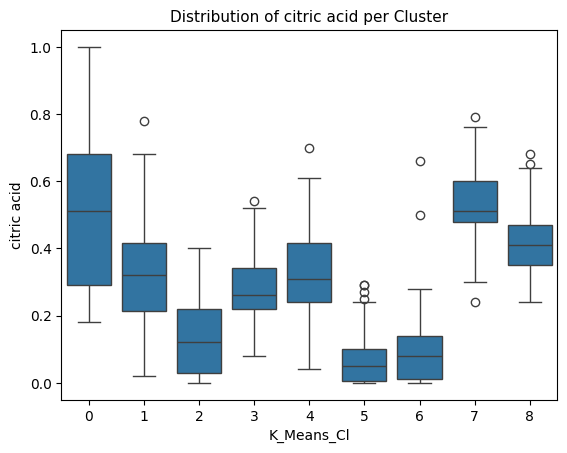

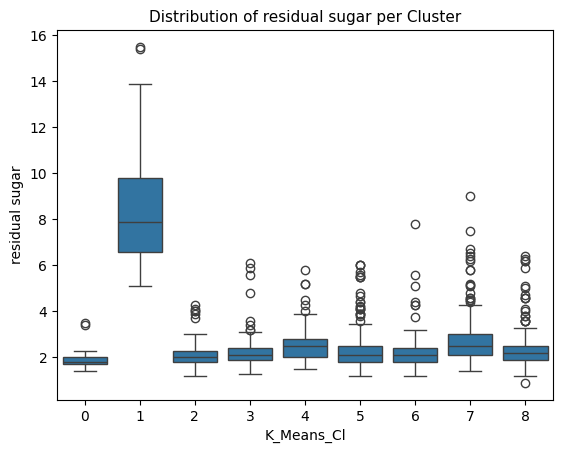

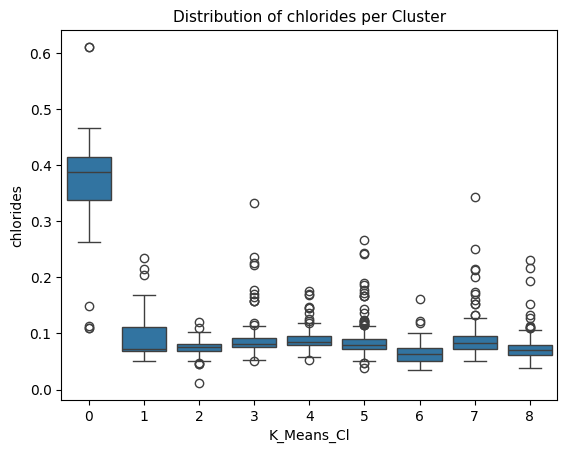

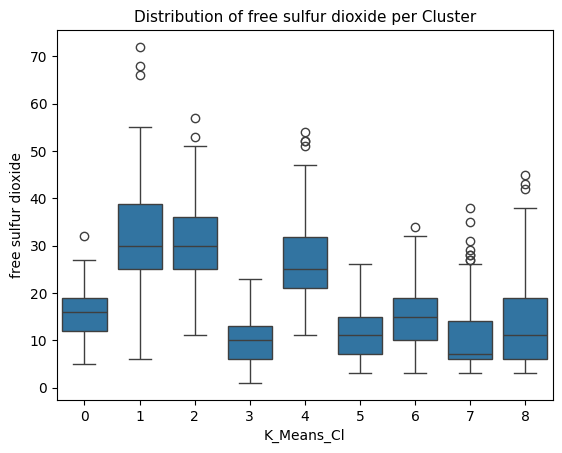

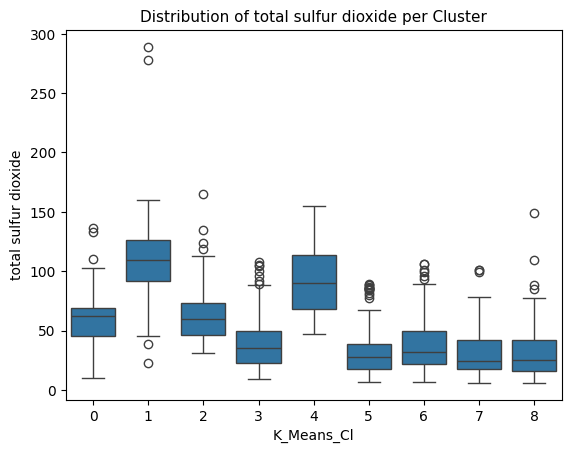

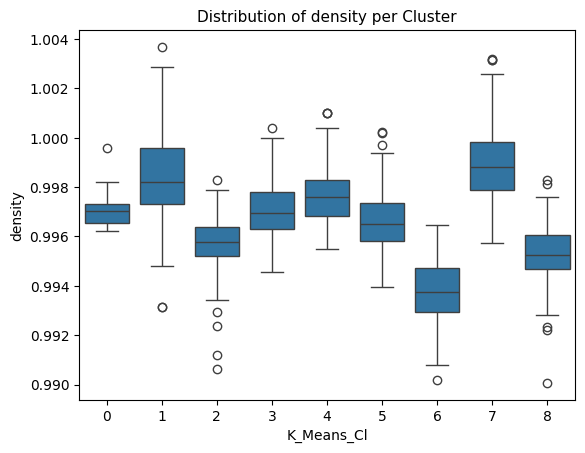

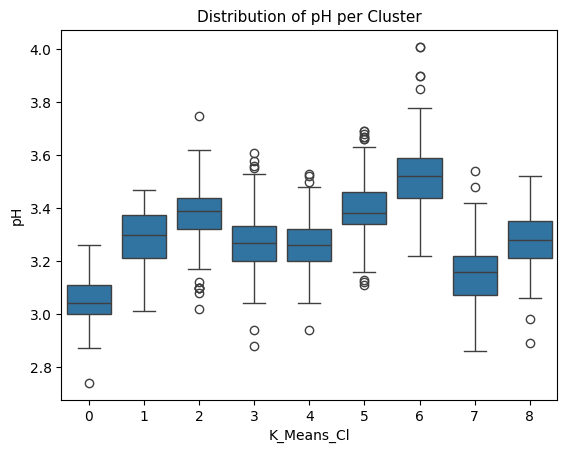

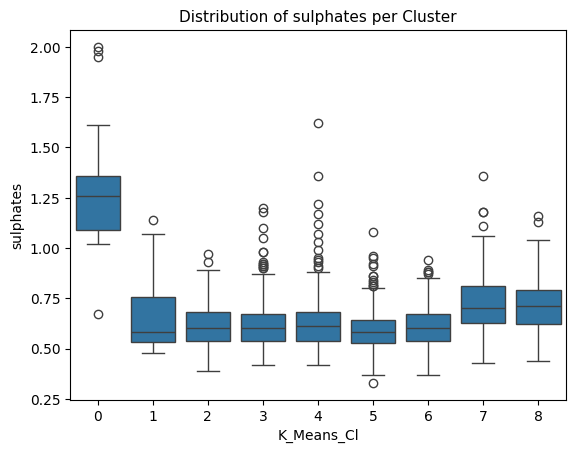

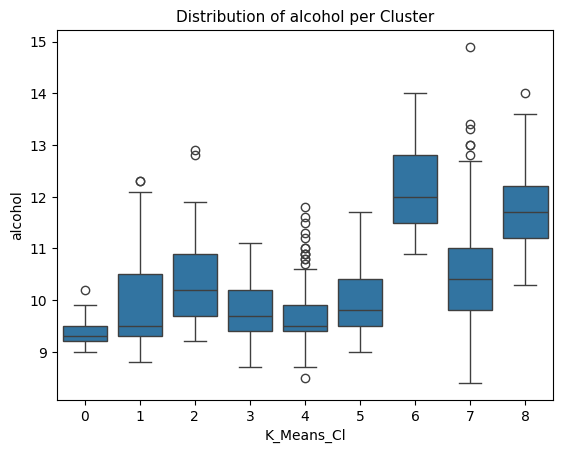

In [ ]:
### For loop over all features

for feature in feature_lst:

  sns.boxplot(
      data = Wines_No_Dupe,
      x = 'K_Means_Cl',
      y = f"{feature}"
  )

  plt.title(f"Distribution of {feature} per Cluster",fontsize = 11)
  plt.show()
  print()

#### Viz Interpetations and Conclusions:

<u>**Notes:**</u>

We note that the clusters were relabeled based on the volume of High Quality (quality = 1) wines within them, with cluster 8 containing a bulk of the high quality wines, and cluster 0 containing the least amount.

When analyzing the box plot, we notice:

* The higher clusters have lower volatile acidity (peaking at cluster 5, then steadily declining over clusters 6-8), potentially indicating that quality wines contain less gaseous acids.
* The more quality wines (particulary in cluster 8), have low levels of residual sugar.
* Clusters 6 and 8 have the lowest median amount of cholorides. The wines in cluster 0, which contained the least amount of high quality wines, has by far the highest amount of cholorides.
* Median Total Sulfur Dioxide Levels for wines in clusters 7 and 8 are the lowest from all the other clusters.
* Wines in Clusters 6 and 8 have the lowest median densities versus all other clusters
* Median Ph levels are lowest for wines in cluster 0, while cluster 6 has the highest amount.
* Wines in Clusters 6 through 8 have the highest median alchol contents while wines in clusters 0 through 5 all sit between 9-10% abv.

Overall, according to our clusters, we classify high quality wines as: having lower volatile acidity, lower levels of residual sugar, lower cholorides, lower Sulfur Dioxide, lower densities, lower ph, and higher alcohol contents. Wines of lower quality appear to exhibit the opposite of these traits, and as such are more prevalent in the lower numbered clusters.